In [1]:
from cluster_model import get_dataset, get_transformer, DATASET_NAME, MODEL_NAME, SEED, N_DATASIZE, get_block_out_label, N_BLOCKS
import cluster_model

ds = get_dataset(DATASET_NAME)
model, _ = get_transformer(MODEL_NAME)
shuffled = ds.shuffle(seed=SEED)['train'][:N_DATASIZE]['text']

ds = shuffled
labs = [get_block_out_label(i) for i in range(N_BLOCKS)]

/home/lev/code/research/ai/lattice_cluster_paths/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Loaded pretrained model EleutherAI/pythia-70m into HookedTransformer
Moving model to device:  cuda


In [2]:
import importlib
importlib.reload(cluster_model)

# TODO: auto sim cutoff needed
decomp = cluster_model.Decomposer(model, ds, labs)
decomp.load()

Creating decomposer with parameter hash bc59bc4fbdc5fbf0582034fc1f46b24d5a7e80f2
Created dataset
Loading dataset from cache
Got embeddings
Loading cluster scores from cache


In [3]:
decomp.lattice_scores[0].shape

(512, 512)

In [4]:
from typing import List
import utils
importlib.reload(utils)
modified_lattice = decomp.lattice_scores.copy()

# TODO: have function which does something like fixing from the a specific neuron?
# Ie have the sub-lattice with only **related** neurons

def cutoff_lattice(lattice: List[List[List[float]]], related_cutoff = 1):
    print(lattice[0].sum())
    r = [(layer > related_cutoff) * layer for layer in lattice]
    print(r[0].sum())
    return r

def create_sublattice(lattice, layer: int, idx_in_layer: int, related_cutoff = 10):
	with_cutoff = cutoff_lattice(lattice, related_cutoff)

LAST_FEAT = 20
modified_lattice = cutoff_lattice(decomp.lattice_scores, related_cutoff=15)

# utils.top_k_dag_paths_dynamic(modified_lattice, k=10_000)

59.51700280064797
0.0


## Isolate Specific Neurons

In [5]:
LAYER = 0
NEURON = 128

In [7]:
import numpy as np
import kernel
from IPython.core.display import display, HTML
from circuitsvis.utils.render import render
import graph
importlib.reload(cluster_model)
importlib.reload(utils)
importlib.reload(graph)
importlib.reload(kernel)

N_CHECK = 4

decomp.scores_for_neuron(LAYER, NEURON)

/tmp/ipykernel_146834/1253852910.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Getting top 30 paths
([128, 326, 326, 326, 326, 197], -4.166013166359513)
([128, 478, 478, 478, 478, 478], -4.171363166359513)
([128, 128, 326, 326, 326, 197], -4.191483166359514)
([128, 128, 56, 56, 56, 56], -4.192033166359513)
([128, 326, 326, 326, 326, 326], -4.199043166359513)
([128, 326, 326, 326, 326, 107], -4.219533166359513)
([128, 128, 478, 478, 478, 478], -4.220253166359513)
([128, 326, 326, 326, 326, 202], -4.224093166359514)
([128, 128, 326, 326, 326, 326], -4.224513166359514)
([128, 157, 23, 23, 157, 197], -4.224883166359513)
([128, 326, 326, 326, 326, 226], -4.225963166359513)
([128, 326, 326, 326, 326, 21], -4.228293166359514)
([128, 157, 23, 157, 157, 197], -4.232913166359514)
([128, 326, 326, 326, 326, 143], -4.238203166359513)
([128, 326, 326, 326, 326, 201], -4.238873166359514)
([128, 326, 326, 326, 326, 128], -4.239413166359514)
([128, 128, 326, 326, 326, 107], -4.245003166359513)
([128, 128, 326, 326, 326, 202], -4.249563166359514)
([128, 128, 326, 326, 326, 226], 

## Look at distributions of scores

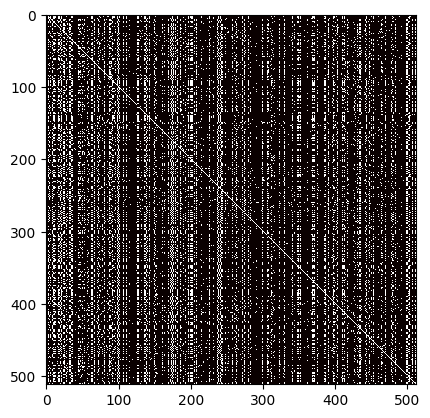

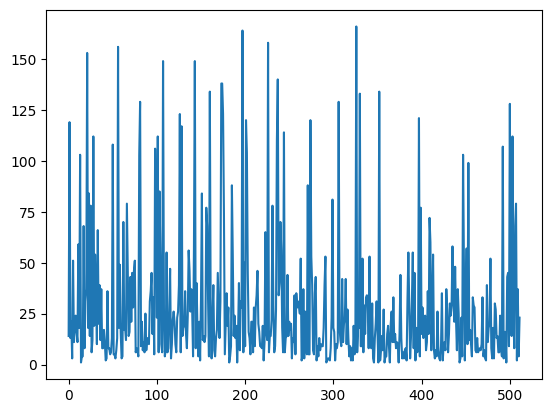

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get distribution of lattice scores

LAYER_START = 4
cutoff = 0.1

# ax = sns.heatmap(decomp.lattice_scores[LAYER_START])
plt.imshow((decomp.lattice_scores[LAYER_START] > cutoff), cmap='hot', interpolation='nearest')
plt.show()

plt.plot((decomp.lattice_scores[3] > cutoff).sum(axis=1))

## Get scores for layers

In [ ]:
decomp.scores_for_layer(0)

Getting top 30 paths
Got top 30 paths
Trying with cluster diffence cutoff 3
Trying with cluster diffence cutoff 2
Trying with cluster diffence cutoff 1
LOOKING AT PATH [0, 478, 478, 478, 478, 478]
[1.      0.9     0.81    0.729   0.6561  0.59049]
Scoring on 0 of 459325
Scoring on 20480 of 459325
Scoring on 40960 of 459325
Scoring on 61440 of 459325
Scoring on 81920 of 459325
Scoring on 102400 of 459325
Scoring on 122880 of 459325
Scoring on 143360 of 459325
Scoring on 163840 of 459325
Scoring on 184320 of 459325
Scoring on 204800 of 459325
Scoring on 225280 of 459325
Scoring on 245760 of 459325
Scoring on 266240 of 459325
Scoring on 286720 of 459325
Scoring on 307200 of 459325
Scoring on 327680 of 459325
Scoring on 348160 of 459325
Scoring on 368640 of 459325
Scoring on 389120 of 459325
Scoring on 409600 of 459325
Scoring on 430080 of 459325
Scoring on 450560 of 459325
LOOKING AT PATH [0, 326, 326, 326, 326, 197]
[1.      0.9     0.81    0.729   0.6561  0.59049]
Scoring on 0 of 459325


KeyboardInterrupt: 